# Preprocessing Audio Signal

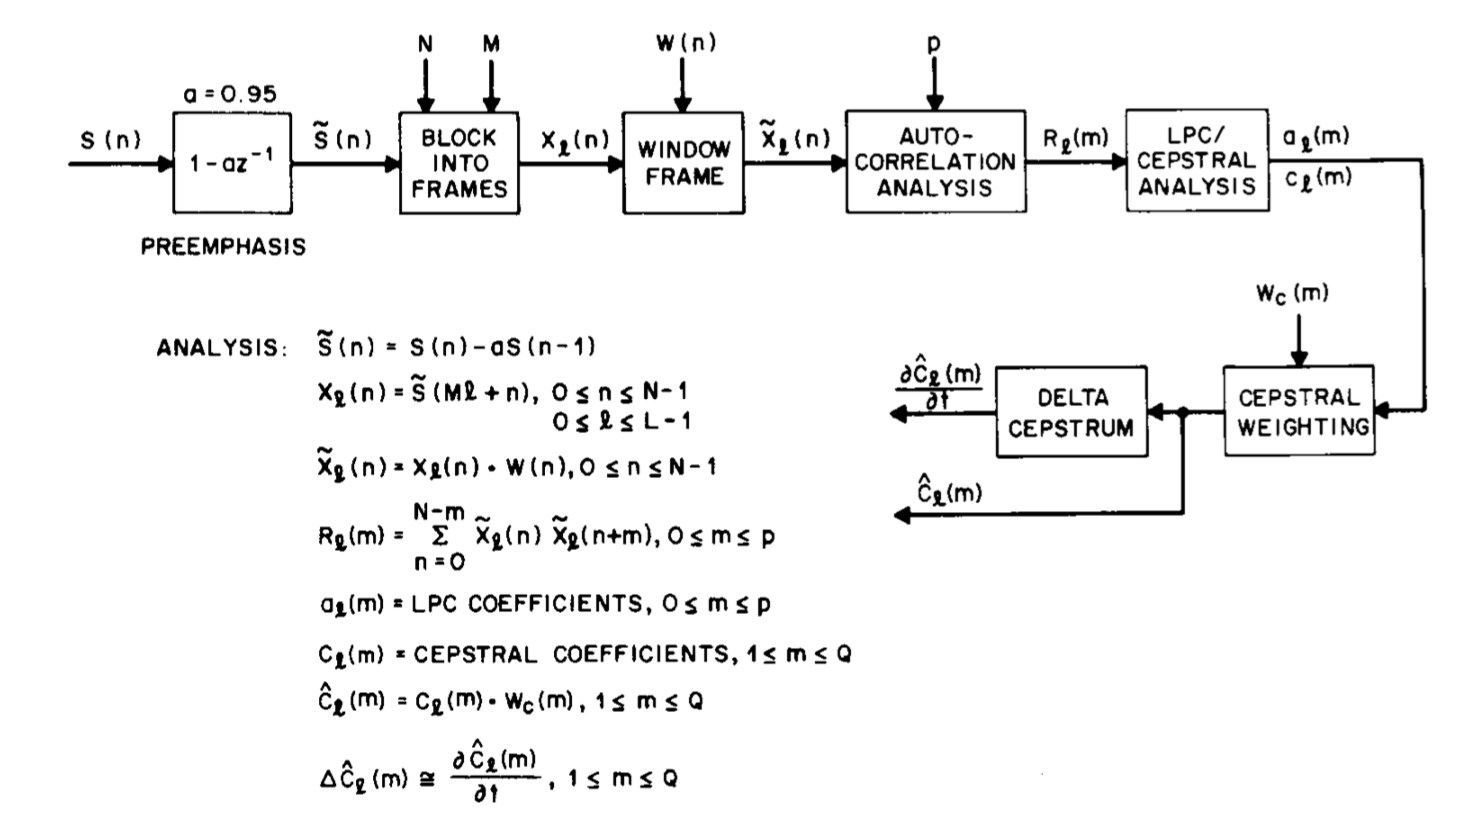

In [95]:
from audiolazy.lazy_wav import WavStream
from audiolazy import AudioIO
from audiolazy.lazy_analysis import window
import numpy

import plotly.plotly as plot
import plotly.graph_objs as graph

# Get Data From File

In [96]:
sound = WavStream('data/seven/0a0b46ae_nohash_0.wav')
# with AudioIO(True) as player:
#     player.play(sound, rate=sound.rate, channels=sound.channels)

print('rate', sound.rate)
print('channels', sound.channels)

rate 16000
channels 1


# Split Data Into Blocks

In [102]:
blockified = sound.blocks(size=500, hop=100)
block = blockified.peek(100)[-1]
#print(block)

In [103]:
data = graph.Data([ graph.Scatter(x=list(range(len(block))), y=list(block)) ])
plot.iplot(data, filname='line-mode')

# Window A Block

In [104]:
hammingWindow = window.hamming(500)
#print(hammingWindow)

In [105]:
windowed = numpy.multiply(hammingWindow, block)
#print(windowed)

In [106]:
data = graph.Data([ 
    graph.Scatter(x=list(range(len(windowed))), y=list(windowed))
])
plot.iplot(data, filname='line-mode')